# Simple Neural Network:
In this notebook, a fully vectorized 2-layer neural network will be implemented from scratch.   
This will 'learn' the XOR gate.

In [560]:
# IMPORTS:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

In [561]:
# DATA: The XOR truth table.
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

In [562]:
# ARCHITECTURE:
n0 = 2
n1 = 2
n2 = 1
m = 4

In [563]:
# INPUTS & OUTPUTS:
A0 = inputs.T # Each datapoint is a column.
Y = expected_output.T # Converted to row vector

In [564]:
# WEIGHTS: 
W1 = np.random.uniform(size = (n1, n0))
W2 = np.random.uniform(size = (n2, n1))

# BIASES: 
# Gets added to each column, although mathematically, W*A and b aren't of the same order. Python broadcasting helps us here.
b1 = np.random.uniform(size = (n1, 1))
b2 = np.random.uniform(size = (n2, 1))

In [565]:
# SIGMOID ACTIVATION FUNCTION:
def sigmoid (z):
    return 1/(1 + np.exp(-z))

def sigmoidDerivative(z):
    return sigmoid(z)*(1 - sigmoid(z))

In [566]:
# BINARY CROSS-ENTROPY LOSS FUNCTION (BCE):
def loss(Y_hat, Y):
    return -1*(Y*(np.log(Y_hat)) + (1 - Y)*(1 - np.log(Y_hat)))

In [567]:
# COST FUNCTION:
def cost(Y_hat, Y):
    return (1/m)*np.sum(loss(Y_hat, Y))

costList = [] # Will be used for plotting later.

In [568]:
# GRADIENT DESCENT PARAMETERS:
alpha = 1 # Learning rate.
N_ITERS = 10000 # Total iterations.

In [569]:
for _ in range(N_ITERS):
    
    # FORWARD-PROPOGATION:
    Z1 = np.matmul(W1,A0) + b1
    A1 = sigmoid(Z1)
    
    Z2 = np.matmul(W2,A1) + b2
    A2 = sigmoid(Z2)
    Y_hat = A2 # The prediction for all datapoints.
    
    # FINDING OUT THE COST:
    costList.append(cost(Y_hat, Y))

    # BACKWARD-PROPOGATION:
    dZ2 = A2 - Y
    dW2 = (1/m)*np.matmul(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.matmul(W2.T, dZ2)*(sigmoidDerivative(Z1))
    dW1 = (1/m)*np.matmul(dZ1, A0.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    # GRADIENT-DESCENT:
    W1 -= alpha*dW1
    W2 -= alpha*dW2
    b1 -= alpha*db1
    b2 -= alpha*db2

In [570]:
print("Our predictions: ", Y_hat[0])

Our predictions:  [1.26593947e-03 9.99118467e-01 9.99118639e-01 9.04627499e-04]


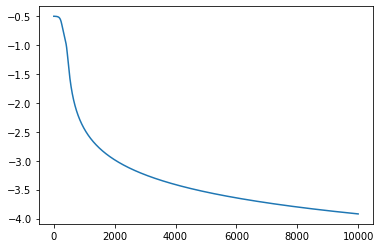

In [571]:
plt.plot(np.linspace(1, N_ITERS, N_ITERS), costList)
plt.show()

The cost function decreases monotonically, and good accuracy is achieved.